<a href="https://colab.research.google.com/github/SujitbMusale/Linear-Regression-Car-Dhekho-Price-Prediction/blob/main/Car_Deko_Price_Prediction_By_Liner_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**-In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

***The columns in the given dataset are as follows:***
name

1.   year
2.   selling_price
3.   km_driven
4.   fuel
5.   seller_type
6.   transmission
7.   Owner


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data =pd.read_csv('/content/drive/MyDrive/almabetter/csv files/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


year,selling_price, km_driven are the numerical variable...




In [ ]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
# no null value present

In [ ]:
data['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [ ]:
# so here in data set total 4 number of cars present and we can see that the count for 'disel' and 'petrol' is above 2k where other type of fuled car less in numbers

<BarContainer object of 5 artists>

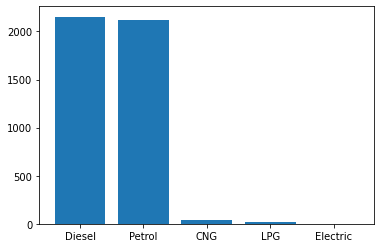

In [ ]:
plt.bar(data['fuel'].value_counts().keys(),data['fuel'].value_counts())

In [ ]:
print(len(data['name'].unique()))

1491


In [ ]:
# here we can see that total 1491 unique car nem present inside the data set
# lets check the top 5 car in the list
data['name'].value_counts()[0:5]

Maruti Swift Dzire VDI    69
Maruti Alto 800 LXI       59
Maruti Alto LXi           47
Maruti Alto LX            35
Hyundai EON Era Plus      35
Name: name, dtype: int64

In [ ]:
# maruti is having maximum number of car at top

Text(0, 0.5, 'car count')

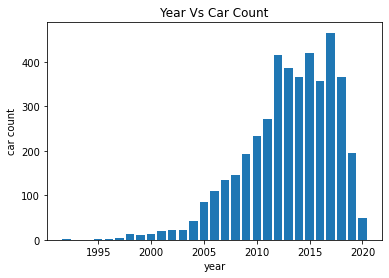

In [ ]:
data['year'].value_counts()
plt.bar(data['year'].value_counts().keys(),data['year'].value_counts())
plt.title('Year Vs Car Count')
plt.xlabel('year')
plt.ylabel('car count')

In [ ]:
# so we can say that the most of the car are from the 2017 year
# trend is increasing per year

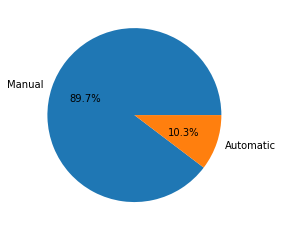

In [ ]:
data['transmission'].value_counts()
plt.pie(data['transmission'].value_counts(),labels=data['transmission'].value_counts().keys(),autopct = '%1.1f%%')
plt.show()

In [ ]:
# manual tranmission having large count than automaic transmission
# we can see that the only 10.3% cars are automatic car and 89.7% cars are manual car.

In [ ]:
data['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

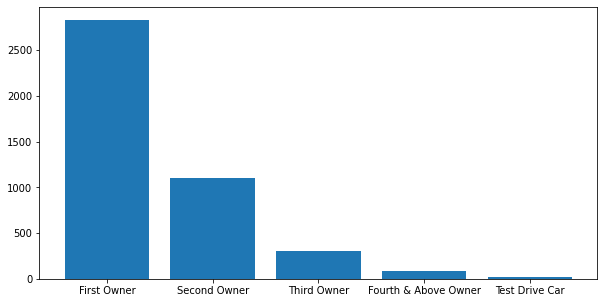

In [ ]:
# here we can also note the things the 1st woner car are large in number
# lets have a bar chart plot for same
plt.figure(figsize=(10,5))
plt.bar(data['owner'].value_counts().keys(),data['owner'].value_counts())
plt.show()

In [ ]:
# checking duplicate value in data
data.shape

(4340, 8)

In [ ]:
data[data.duplicated()].shape

(763, 8)

In [ ]:
# so from above reading 763 rows are duplicate which we need to drop
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(3577, 8)

In [ ]:
# here we got the data set without duplicates value in it.

In [ ]:
# lets separeate the numerical variable and catogerical variable for further analysis
n_var =  data.describe().columns.tolist()


print(n_var)


['year', 'selling_price', 'km_driven']


In [ ]:
# so this 'year', 'selling_price' and 'km_driven' are numeric variable
# lets check the distribution of data 

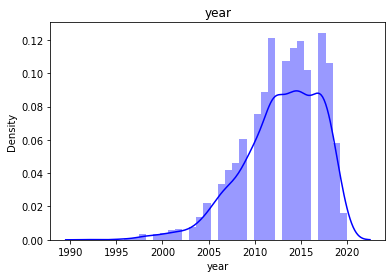

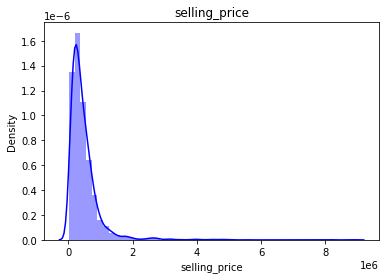

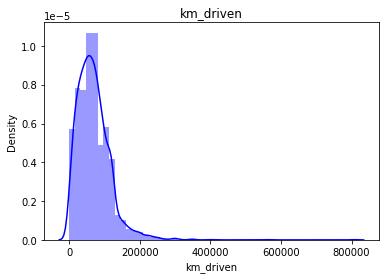

In [ ]:
for col in n_var:
  sns.distplot(data[col],kde=True,color='blue')
  plt.title(col)
  plt.show()

### have to tranfer the data to the gausion distribution

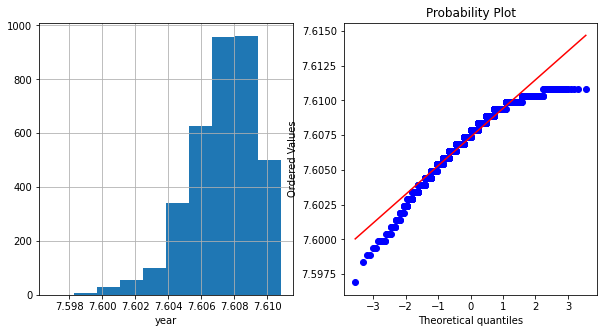

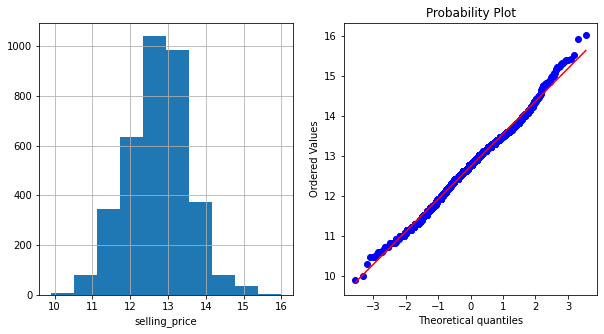

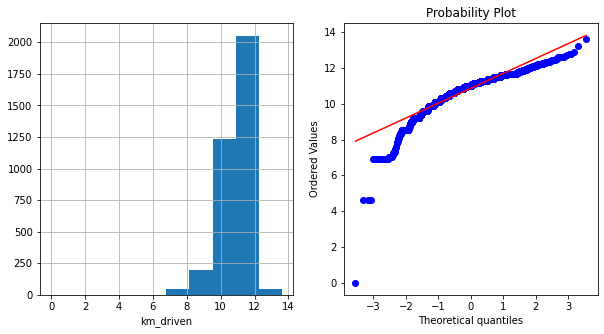

In [ ]:
# here we can clearly see that the selling price which is dependent variable is positively skeweed and Km_driven also
# so need to tranform this data to the normal distribution by douning log transform
# as data is highly skeweed we will take log tranfotmation
for col in n_var:
  fig= plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  feature = np.log(data[col])
  feature.hist()
  plt.xlabel(col)
  plt.subplot(1,2,2)
  stats.probplot(feature, dist="norm", plot=plt)
  plt.show()



In [ ]:
# here from Q-Q plot we can observe that the most of the points are on straight line so we can say that the after log tranform we get normalized data.

* lets check the correlation between dependent and independent variables

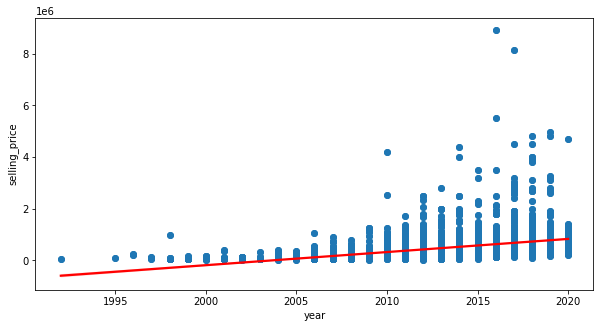

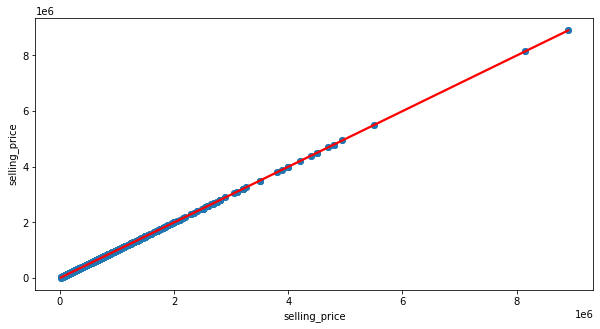

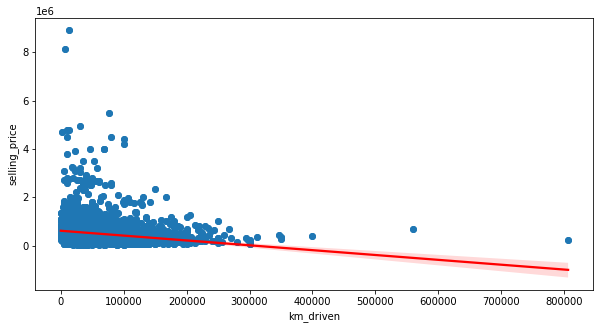

In [ ]:
for col in n_var:
  figure = plt.figure(figsize=(10,5))
  ax=fig.gca()
  feature = data[col]
  label=data['selling_price']
  correlation = feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('selling_price')
  ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
  sns.regplot(x=data[col],y=label,line_kws={'color':'red'})


In [ ]:
# from above plot we can see that the selling price is having possitive relation with year mean as year come to more recent we will have the increase selling price
# also for as car price increase the km_driven get reduce means car use is less thats why proce decrease with the increase in Km run by that car. 

**Finaly we will look in to correlation plot for numerical variable** 

[]

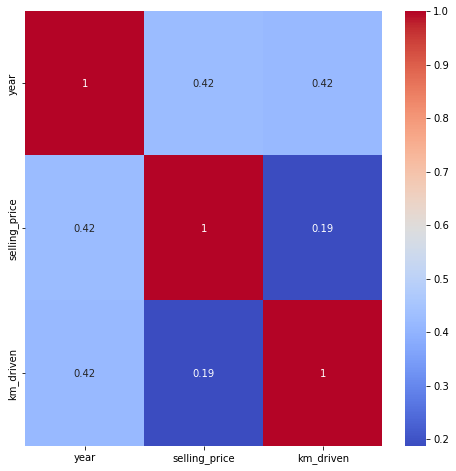

In [ ]:
plt.figure(figsize=(8,8))
correlation =data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

plt.plot()

Lets Work on Correlation by using VIF

In [ ]:
def cal_vif(X):
  vif=pd.DataFrame()
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
cal_vif(data[[i for i in data.describe().columns if i in ['year','selling_price','km_driven']]])

,VIF
0,4.616260
1,1.937508
2,3.224603


*We Can see that the vif is less than 5 for all three variable so no need to drop or convert variable from the data set*

**Lets work on Categorical variable now**

In [ ]:
# will check the unique name initially so that we can replace speling misteck or multiple name with same meaning to have a good unique list
print(pd.Series(c_var))

0            name
1            fuel
2     seller_type
3    transmission
4           owner
dtype: object


In [ ]:
# lets check unique name 

data['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

*Let's add one more variable i.e "company" name to the data set.*

In [ ]:
data['company']=data['name'].str.split(" ",expand=True)[0]

In [ ]:
data['company'] = data['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})
data['company'] = data['company'].str.title()
data['company'].value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
Bmw                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
Mg                  2
Opelcorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: company, dtype: int64

In [ ]:
data['company'].value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
Bmw                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
Mg                  2
Opelcorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: company, dtype: int64

In [ ]:
# categorical variables
c_var = []
for i in data.columns.tolist():
  if i not in n_var:
    c_var.append(i)
print(c_var)

['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company']


*Let's Plot bar plot to have a look of the how categorical variable are count is distributed*

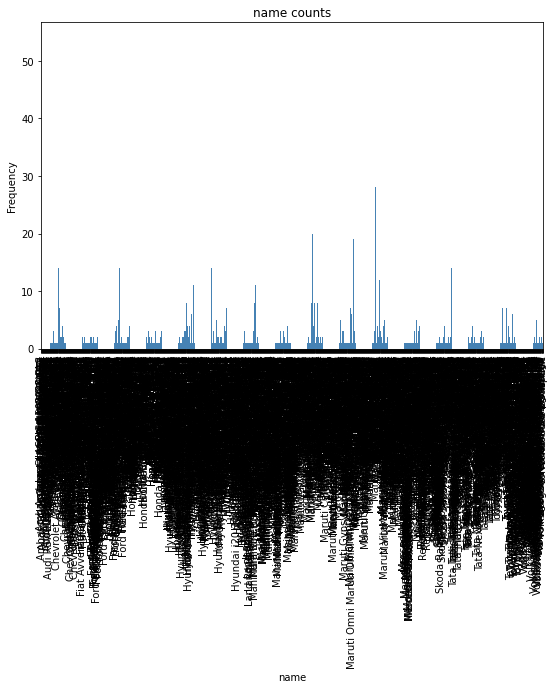

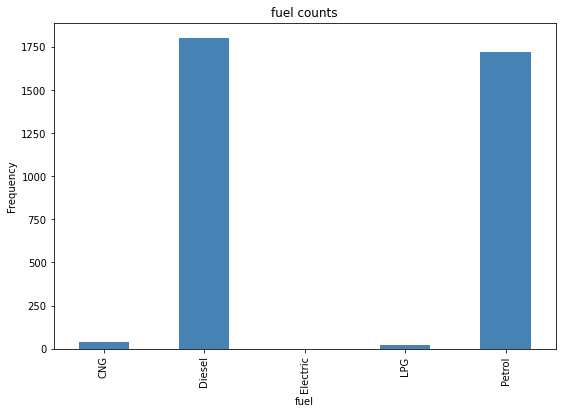

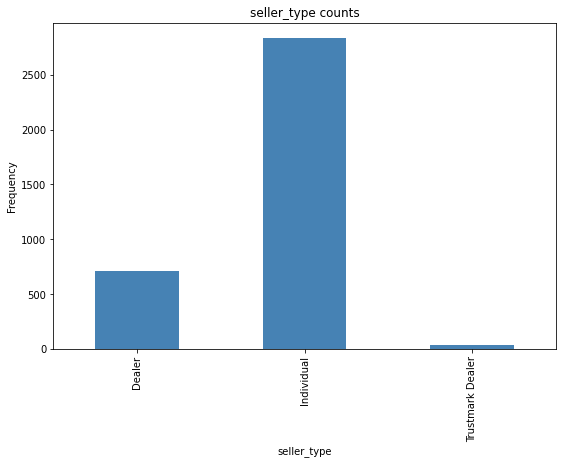

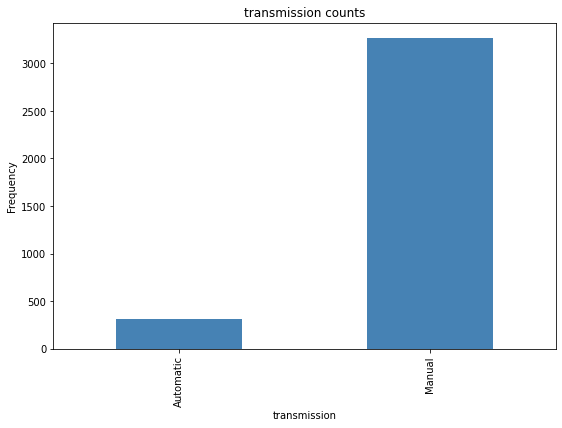

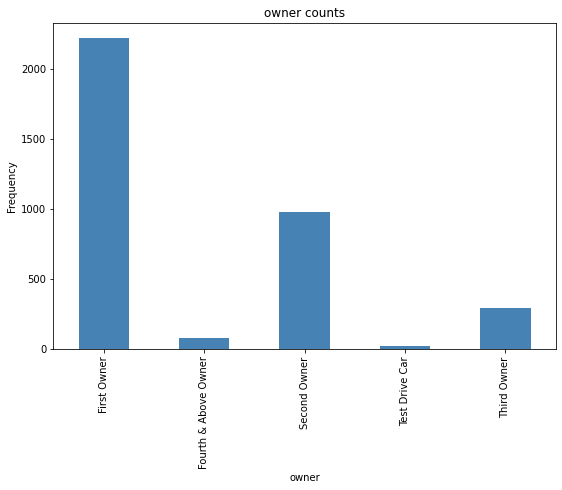

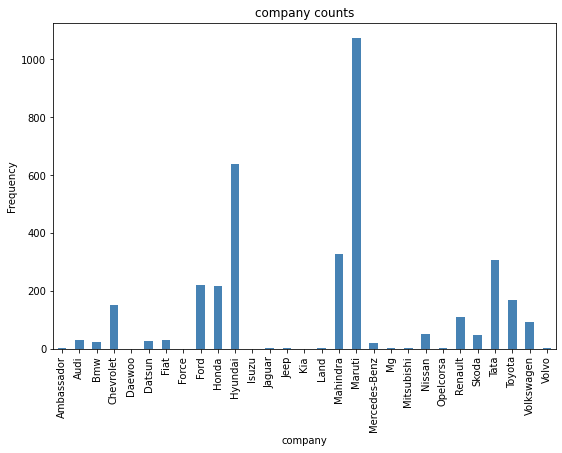

In [ ]:
for col in c_var:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
# from above barh plot its seen that diesel and petrol fuel type are the havine high count for selling as compaired to "CNC" and "LPG" fuel type.
# Also "Individual" are having large count or they prefered to sell the car by using car dekho facility as compaired to "dealer" and "trustmark Dealer".
# "First Owner" and "Second Owner" are more preferd to sell car by car dhko facility.
# "Maruti" company's are car which are more as compaired to other car which get sell by our facility.

